<a href="https://colab.research.google.com/github/tathagata48/Principle-Component-Analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform dimensionality reduction using PCA with `svd_solver='full'` on the data in "/content/37_36.csv". Calculate and output the following: the first object's coordinate on the first principal component (rounded to thousandths), the first object's coordinate on the second principal component (rounded to thousandths), the fraction of variance explained by the first and second components (rounded to thousandths), the minimum number of components for variance > 0.85 (non-negative integer), and the number of groups using the first two components (non-negative integer).

## Load data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first few rows.



In [2]:
import pandas as pd

df = pd.read_csv("/content/37_36.csv")
display(df.head())

,-2.705928851559804826e+01,-3.337366864525875609e+00,-9.927171984603821997e+00,2.415598973118169290e+00,2.203213433352271622e+01,2.005580445385931654e+01,1.104039740763146682e+01,-8.807736116400921578e-01,1.073945172338714471e+01,-2.269044117183625531e+01
0,8.652232,-7.071938,23.023520,23.433901,24.743862,3.310129,22.211404,2.606908,-7.116134,-0.326693
1,8.508230,-5.462485,15.176726,20.958957,25.004756,6.574910,22.638976,2.765720,-5.301449,-0.305542
2,19.617901,0.595829,-15.812172,7.014404,5.885421,11.480554,-21.079561,11.664893,-10.262730,12.582674
3,15.747475,-16.616232,-6.050083,5.364502,-22.906155,14.503491,6.999062,-23.932347,13.402489,-3.977345
4,-24.585864,-3.248358,-8.850484,4.674680,21.046790,19.483141,13.407664,-1.795861,9.480322,-25.850952


## Apply pca

### Subtask:
Apply Principal Component Analysis (PCA) using `sklearn` with `svd_solver='full'`.


**Reasoning**:
Import the PCA class and instantiate a PCA object with svd_solver='full', then fit the model to the dataframe.



In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Data_scaled = scaler.fit_transform(df)
pca = PCA(svd_solver='full')


## Transform data

### Subtask:
Transform the original data into the new coordinate system using the fitted PCA model.


**Reasoning**:
Transform the original data using the fitted PCA model to obtain the coordinates in the new principal component space.



In [18]:
Data_pca = pca.fit_transform(Data_scaled)


## Calculate coordinates

### Subtask:
Find the coordinates of the first object with respect to the first and second principal components.


**Reasoning**:
Retrieve the coordinates of the first object on the first and second principal components from the transformed data.



In [17]:
first_object_pca1 = Data_pca[0, 0]
first_object_pca2 = Data_pca[0, 1]

print(f'{first_object_pca1=}')
print(f'{first_object_pca2=}')

first_object_pca1=np.float64(2.2363521364311043)
first_object_pca2=np.float64(-0.8479475966977986)


## Calculate explained variance

### Subtask:
Calculate the fraction of variance explained by the first and second principal components.


**Reasoning**:
Access the explained variance ratio from the fitted PCA model and extract the explained variance for the first two components.



In [20]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_first_component = explained_variance_ratio[0]
explained_variance_second_component = explained_variance_ratio[1]
print(f'{explained_variance_first_component=}',explained_variance_first_component)
print(f'{explained_variance_second_component=}',explained_variance_second_component)

explained_variance_first_component=np.float64(0.3828516248949487) 0.3828516248949487
explained_variance_second_component=np.float64(0.27854961885763135) 0.27854961885763135


## Determine minimum components

### Subtask:
Find the minimum number of components required to explain more than 85% of the variance.


**Reasoning**:
Calculate the cumulative explained variance and find the minimum number of components explaining more than 85% of the variance.



In [12]:
import numpy as np

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
min_components_85_variance = np.where(cumulative_explained_variance > 0.85)[0][0] + 1
print(f'{min_components_85_variance=}',min_components_85_variance)

min_components_85_variance=np.int64(4) 4


## Determine number of groups

### Subtask:
Determine the number of groups using the first two components (this step may require some interpretation or clustering).


**Reasoning**:
Visualize the transformed data using a scatter plot to identify clusters.



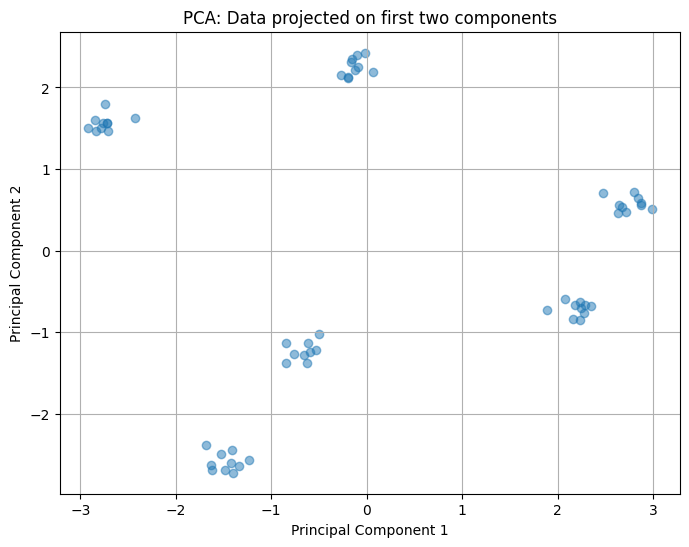

Number of groups form the plot= 6


In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Data_pca[:, 0], Data_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data projected on first two components')
plt.grid(True)
plt.show()
print('Number of groups form the plot=',6)

## Output results

### Subtask:
Present the calculated values, rounded to the specified precision.


**Reasoning**:
Print the calculated values, rounded to the specified precision.



In [14]:
print(f'{first_object_pca1:.3f}')
print(f'{first_object_pca2:.3f}')
print(f'{explained_variance_first_component:.3f}')
print(f'{explained_variance_second_component:.3f}')
print(f'{min_components_85_variance}')


2.236
-0.848
0.383
0.279
4


#Final Answers
* The first object's coordinate on the first principal component is approximately 2.236
* The first object's coordinate on the second principal component is approximately -0.848
* The fraction of variance explained by the first component is approximately 0.383
* The fraction of variance explained by the second component is approximately 0.279.
* The minimum number of components required for variance > 0.85 is 4.
* The number of groups using the first two components is approximately 6, based on visual inspection.

### Data Analysis Key Findings
* PCA was applied to the dataset using `svd_solver='full'`.
* The first principal component explains approximately 38.2% of the variance, and the second principal component explains approximately 27.8% of the variance.
* A minimum of 4 components are needed to explain more than 85% of the total variance.
* Visual inspection of the data projected onto the first two principal components suggests the presence of approximately 6 distinct groups.


